## **Data exploring**

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
twt=pd.read_csv('tweets.csv')
twt.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
twt.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [ ]:
twt['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


<ipython-input-92-85193df54867>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=twt, palette='viridis')


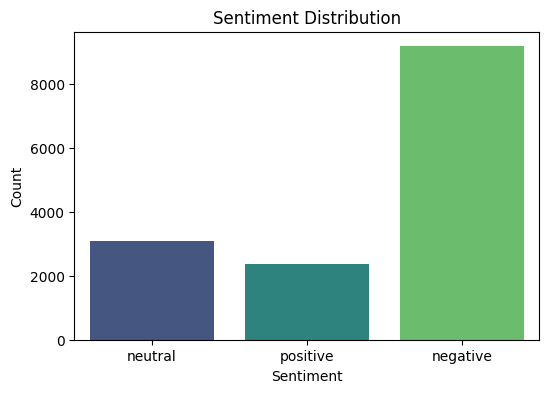

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=twt, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

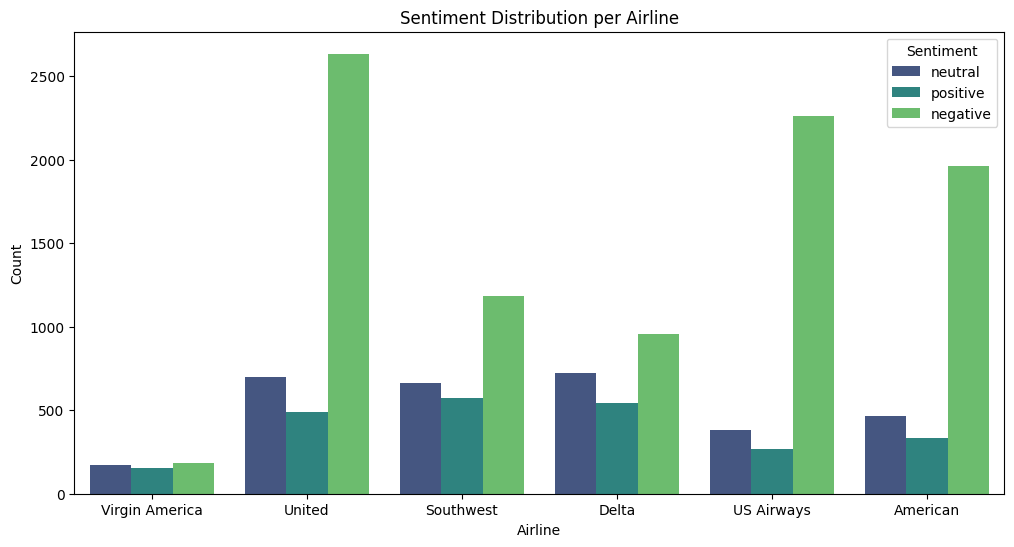

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='airline', hue='airline_sentiment', data=twt, palette='viridis')
plt.title('Sentiment Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

## **Data** **preprocessing**

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

corpus = []
for i in range(len(twt)):
    review = re.sub('[^a-zA-Z]', ' ', twt['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['virginamerica dhepburn said', 'virginamerica plu ad commerci experi tacki', 'virginamerica today must mean need take anoth trip', 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours', 'virginamerica realli big bad thing', 'virginamerica serious would pay flight seat play realli bad thing fli va', 'virginamerica ye nearli everi time fli vx ear worm go away', 'virginamerica realli miss prime opportun men without hat parodi http co mwpg grezp', 'virginamerica well', 'virginamerica amaz arriv hour earli good', 'virginamerica know suicid second lead caus death among teen', 'virginamerica lt pretti graphic much better minim iconographi', 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p', 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn', 'virginamerica thank', 'virginamerica sfo pdx schedul still mia', 'virginamerica excit first cross countri flight lax mco heard noth great thing 

## **bag of words**

In [ ]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

## **Split the dataset into the Training set and Test set**

In [ ]:
y = twt['airline_sentiment'].values #the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Train a Naive Bayes classifier**

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7708333333333334
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1870
     neutral       0.59      0.54      0.56       614
    positive       0.71      0.66      0.68       444

    accuracy                           0.77      2928
   macro avg       0.71      0.69      0.70      2928
weighted avg       0.76      0.77      0.77      2928



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1636  173   61]
 [ 229  329   56]
 [  98   54  292]]


0.7708333333333334